In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import googletrans
from googletrans import Translator
from deep_translator import GoogleTranslator
import math

In [2]:
# Importing the dataset
df_sales = pd.read_excel('DetailSales.xlsx')

In [21]:
# Translating the datasets' columns

orig_col = df_sales.columns.tolist()
translate = GoogleTranslator(source='auto', target='en')
new_col = translate.translate_batch(orig_col)
df_sales.columns = new_col
df_sales.rename(columns = {'Orden ID':'Order ID',
                           "Precio":'Price',
                           'id':'ID'}, 
                inplace = True)
df_sales['Date'] = pd.to_datetime(df_sales['Date'])
df_sales.sort_values("Date", ascending = True).head()

,ID,Order ID,Product,Name,Amount,Price,Total,Seller,Date,User,Created,Tax
0,3b1c962d,e72de456,50,COLOR RAIZ X50G,3,700,2100,9f04044e,2021-01-08,ADMIN,2021-12-06 06:41:00,1.19
3803,bd6b53aa,e72de456,65,PEREJIL X10G,3,650,1950,9f04044e,2021-01-08,ADMIN,2021-12-06 06:32:00,1.19
3804,d76f658c,cd4af444,65,PEREJIL X10G,6,650,3900,c5abb107,2021-01-08,ADMIN,2021-12-06 06:35:00,1.19
3957,e9d61081,e72de456,66,CHIA X20G,3,950,2850,9f04044e,2021-01-08,ADMIN,2021-12-06 07:29:00,1.19
4171,27f27e5c,e72de456,67,CANELA ASTILLA X10G,3,1520,4560,9f04044e,2021-01-08,ADMIN,2021-12-06 07:50:00,1.19


# Questions
- Can you provide me with an overview of the sales trends over the past two years?
- Which products are selling the most and which are selling the least?
- Are there any particular days of the week or months of the year when sales are higher or lower than usual?
- What is the average unit price for the products sold?
- Which sellers are generating the most revenue for the marketplace?
- Are there any patterns or correlations between sales and taxes?
- Can you provide me with any insights or recommendations based on the data that you have analyzed so far?

### Can you provide me with an overview of the sales trends over the past two years?

In [7]:
# Sales count
total_price_sum = df_sales.groupby('Name')['Total'].sum()

# Original currency (COP)
def original ():
    sales_counts = pd.DataFrame({'Name': total_price_sum.index, 'Total': total_price_sum.values})
    sales_counts = sales_counts.sort_values("Total", ascending = False)
    return sales_counts

# Use this to convert to other exchange rate
def exchange_rate (exc):
    exchange_rate = exc
    sales_counts = pd.DataFrame({'Name': total_price_sum.index, 'Total': (total_price_sum.values*exchange_rate)})
    sales_counts['Total'] = sales_counts['Total'].round(2)
    sales_counts = sales_counts.sort_values("Total", ascending = False)
    return sales_counts

    
sales_counts = original()
sales_counts_USD = exchange_rate(0.00021)

In [44]:
# For calculating purposes

def rumus(haha):
    hasil = haha*0.1
    return hasil

def mmk(mmk):
    mmk = (mmk)*0.1
    return mmk

def floor(b1):
    lenb1 = b1 / rumus(b1)
    result = math.floor(lenb1) * rumus(b1)
    return result

def newjeans(*args):
    arr = []
    bmax = max(args)
    bmin = min(args)
    bmaxf = round(bmax)
    bminf = round(bmin)
    arr.append(bminf - mmk(bminf))
    arr.append(bmaxf + mmk(bmaxf))
    return arr

def plot_top10(title, count):
    # Set style
    sns.set_style('darkgrid')

    # Sort the products by their counts
    count = count
    sales_counts = count.sort_values(by='Total',ascending=False)
    top_10 = sales_counts[:10]

    # Create the plot using sns.catplot()
    plot = sns.catplot(
        x='Name',
        y='Total',
        kind='bar',
        data=top_10,
        order=top_10['Name'].tolist()
    )

    # Title for the plot
    Title = title
    plt.title(Title, weight = 'bold').set_fontsize('26')

    # Changing yticks using newjeans()
    lmaoo = top_10['Total']
    ylimit = newjeans(*lmaoo)

    # Rotate x label to 90 degrees
    plot.set_xticklabels(rotation=90)

    # loop through the sorted products and their counts to add text labels to the bars
    for index, value in enumerate(top_10['Total']):
        plt.text(index + 0.25, value, 
                 str(value), rotation=45,
                ha='center', va='bottom')

    # show the plot
    plt.ticklabel_format(style='plain', axis='y')
    plt.ylim(ylimit)
    plt.show()


#### Top 10 Sale

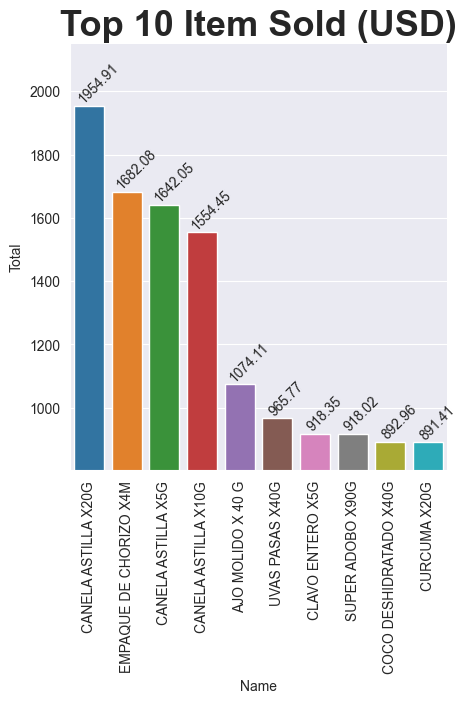

In [45]:
plot_top10(title = 'Top 10 Item Sold (USD)', count = sales_counts_USD)

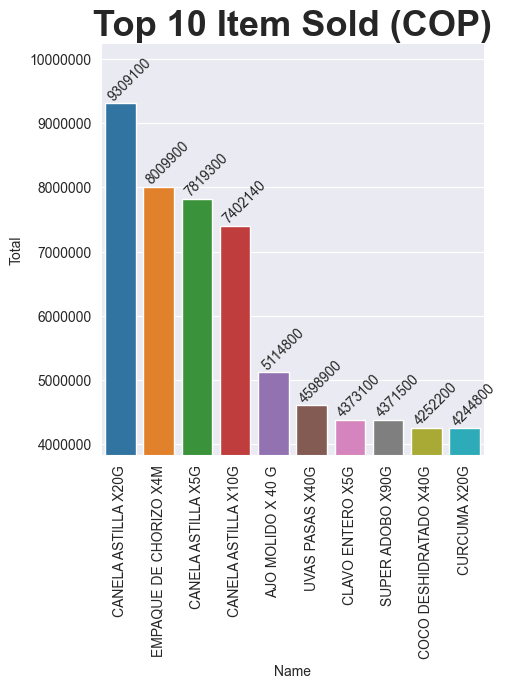

In [46]:
plot_top10(title = 'Top 10 Item Sold (COP)', count = sales_counts)

### Which products are selling the most and which are selling the least?

In [89]:
def ezgroup (by, of, maxmin="max"):
    func = df_sales.groupby(by)[of].sum()
    if maxmin == "min":
        return func.idxmin(), func.min()
    return func.idxmax(), func.max()

In [80]:
least, least_num = ezgroup('Name', 'Amount', 'min')
most, most_num = ezgroup('Name', 'Amount')
text = f"The product that are selling the most is {most} with {most_num:.0f} sale(s), and the least is {least} with {least_num:.0f} sale(s)."
print(text)

The product that are selling the most is CANELA ASTILLA X5G with 9435 sale(s), and the least is AJONJOLI X500G with 1 sale(s).


### Are there any particular days of the week or months of the year when sales are higher or lower than usual?

### What is the average unit price for the products sold?

### Which sellers are generating the most revenue for the marketplace?

### Are there any patterns or correlations between sales and taxes?

In [114]:
price = df_sales["Price"].unique()
tax = df_sales["Tax"].unique()

price,tax

(array([  700,   800,   900,   850,  1000,  1500,  1060,  1100,  2800,
         2600,  2700,  2900,  3000,  3100,  3200,   600,  1600,   400,
          500,  1200,   950,   920,   720,   750,  1400,   650,  1520,
         1350,  1700,  1800,  1900,  2000,  2300,  1150,  2200,  2400,
         2500,   860,   660,   350,   340,  7700,  7500,  7100,  3600,
         3300,  3800,  6050,  6400,  8000,  6900,  5800,   550,  1300,
         3400,  4200,  4700,  8500,  7000,  5000,  5500,  3700,  2550,
         4100,  4350,  2350,  6500, 10000, 14000,  4500,  4900,  5200,
         5400, 11000,   300,  6000,  1850,  3500,  5250,  8800,  8250,
         3650,  4250,  2250, 10800], dtype=int64),
 array([1.19, 0.  , 1.05]))

ValueError: x and y must be the same size

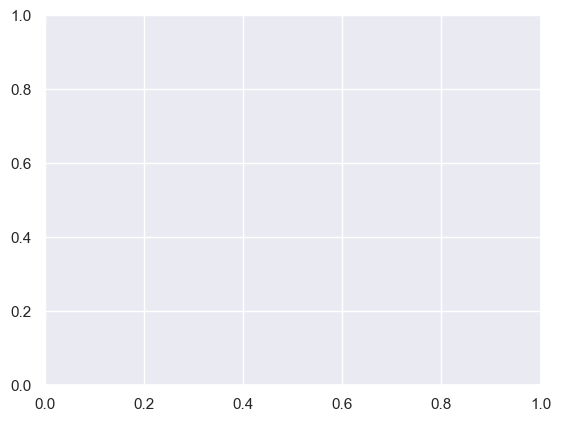

In [115]:
price = df_sales["Price"].unique()
tax = df_sales["Tax"].unique()

plt.scatter(price, tax)
plt.xlabel("Price")
plt.ylabel("Tax")
plt.title("Relationship between Price and Tax")
plt.show()

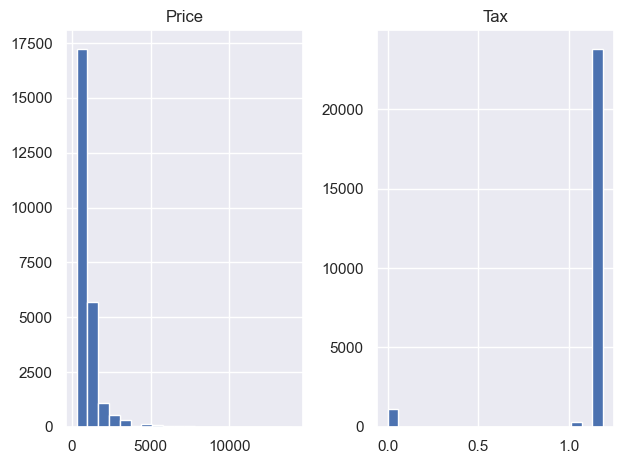

In [116]:
import matplotlib.pyplot as plt

# Create two subplots
fig, (ax1, ax2) = plt.subplots(1, 2)

# Plot the price data on the first subplot
ax1.hist(df_sales["Price"].values, bins=20)
ax1.set_title("Price")

# Plot the tax data on the second subplot
ax2.hist(df_sales["Tax"].values, bins=20)
ax2.set_title("Tax")

# Adjust the spacing between subplots
fig.tight_layout()

# Show the plot
plt.show()


In [117]:
import pandas as pd

price = df_sales["Price"].unique()
tax = df_sales["Tax"].unique()

df = pd.DataFrame({'Price': price})
for t in tax:
    df['Tax ' + str(t)] = df['Price'] * t

print(df)


    Price  Tax 1.19  Tax 0.0  Tax 1.05
0     700     833.0      0.0     735.0
1     800     952.0      0.0     840.0
2     900    1071.0      0.0     945.0
3     850    1011.5      0.0     892.5
4    1000    1190.0      0.0    1050.0
..    ...       ...      ...       ...
80   8250    9817.5      0.0    8662.5
81   3650    4343.5      0.0    3832.5
82   4250    5057.5      0.0    4462.5
83   2250    2677.5      0.0    2362.5
84  10800   12852.0      0.0   11340.0

[85 rows x 4 columns]


### Can you provide me with any insights or recommendations based on the data that you have analyzed so far?